In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [537]:
df= pd.read_csv('/Users/aimaldastagirzada/Downloads/conversion_data.csv')

In [538]:
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [628]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [540]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [541]:
df.head(1)

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1


In [542]:
df.isna().all()

Unnamed: 0           False
visitor_id           False
visitor_location     False
marketing_channel    False
gender               False
product_views_Mon    False
product_views_Tue    False
product_views_Wed    False
product_views_Thu    False
product_views_Fri    False
avg_rating_Mon       False
avg_rating_Tue       False
avg_rating_Wed       False
avg_rating_Thu       False
avg_rating_Fri       False
avg_price_Mon        False
avg_price_Tue        False
avg_price_Wed        False
avg_price_Thu        False
avg_price_Fri        False
time_on_site_Mon     False
time_on_site_Tue     False
time_on_site_Wed     False
time_on_site_Thu     False
time_on_site_Fri     False
pages_visited_Mon    False
pages_visited_Tue    False
pages_visited_Wed    False
pages_visited_Thu    False
pages_visited_Fri    False
converted_Fri        False
dtype: bool

In [543]:
df[df['visitor_id'].isnull() & df['visitor_location'].isnull() & df['marketing_channel'].isnull() & df['gender'].isnull()]

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

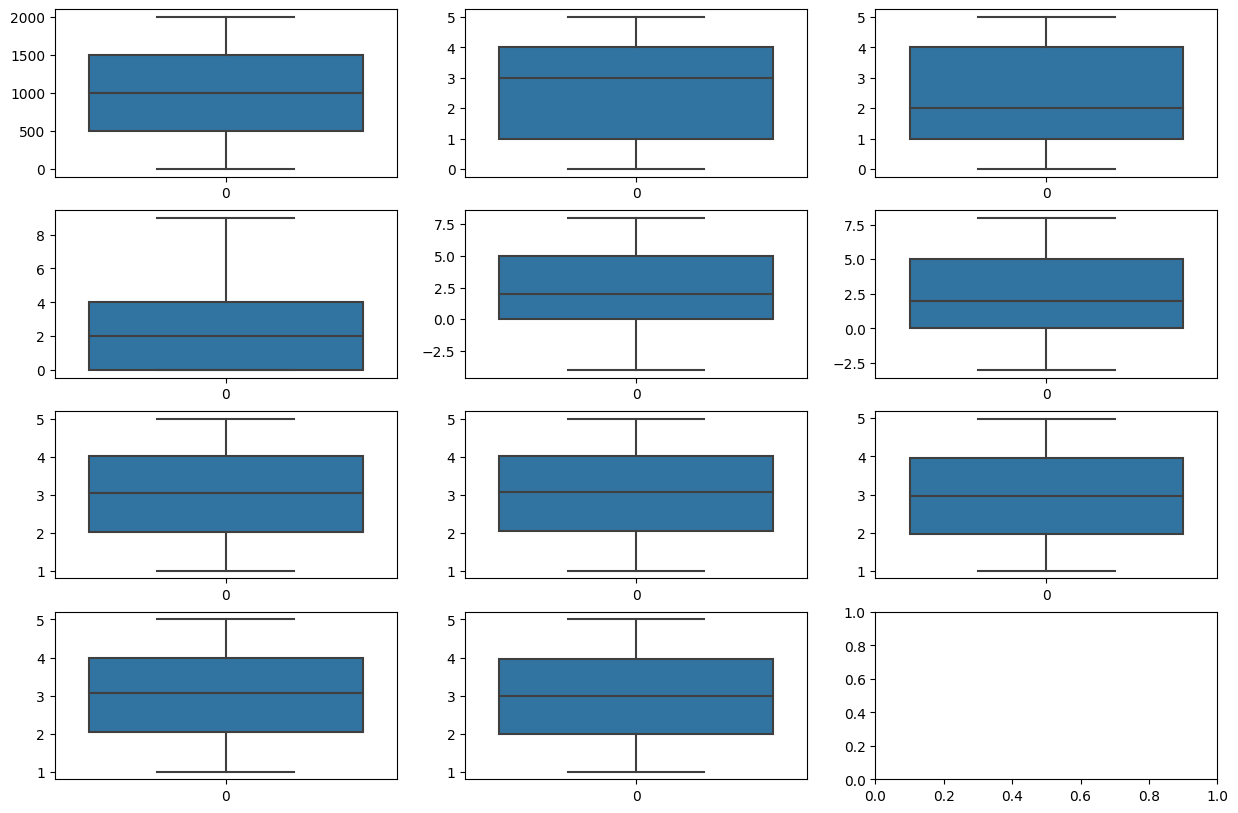

In [545]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.boxplot(df['visitor_id'], ax = axs[0,0])
plt2 = sns.boxplot(df['product_views_Mon'], ax = axs[0,1])
plt3 = sns.boxplot(df['product_views_Tue'], ax = axs[0,2])
plt4 = sns.boxplot(df['product_views_Wed'], ax = axs[1,0])
plt5 = sns.boxplot(df['product_views_Thu'], ax = axs[1,1])
plt6 = sns.boxplot(df['product_views_Fri'], ax = axs[1,2])
plt7 = sns.boxplot(df['avg_rating_Mon'], ax = axs[2,0])
plt8 = sns.boxplot(df['avg_rating_Tue'], ax = axs[2,1])
plt9 = sns.boxplot(df['avg_rating_Wed'], ax = axs[2,2])
plt10 = sns.boxplot(df['avg_rating_Thu'], ax = axs[3,0])
plt11 = sns.boxplot(df['avg_rating_Fri'], ax = axs[3,1])


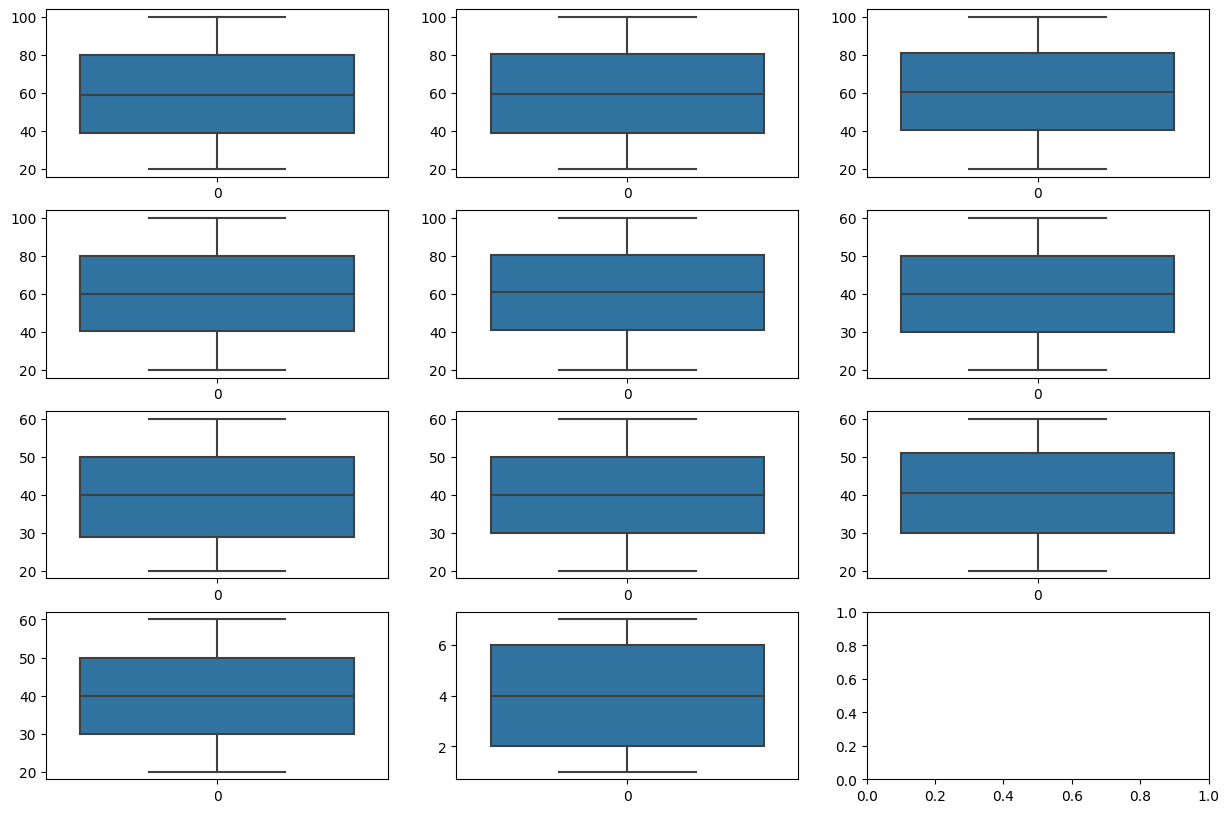

In [546]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.boxplot(df['avg_price_Mon'], ax = axs[0,0])
plt2 = sns.boxplot(df['avg_price_Tue'], ax = axs[0,1])
plt3 = sns.boxplot(df['avg_price_Wed'], ax = axs[0,2])
plt4 = sns.boxplot(df['avg_price_Thu'], ax = axs[1,0])
plt5 = sns.boxplot(df['avg_price_Fri'], ax = axs[1,1])
plt6 = sns.boxplot(df['time_on_site_Mon'], ax = axs[1,2])
plt7 = sns.boxplot(df['time_on_site_Tue'], ax = axs[2,0])
plt8 = sns.boxplot(df['time_on_site_Wed'], ax = axs[2,1])
plt9 = sns.boxplot(df['time_on_site_Thu'], ax = axs[2,2])
plt10 = sns.boxplot(df['time_on_site_Fri'], ax = axs[3,0])
plt11 = sns.boxplot(df['pages_visited_Mon'], ax = axs[3,1])


<Axes: >

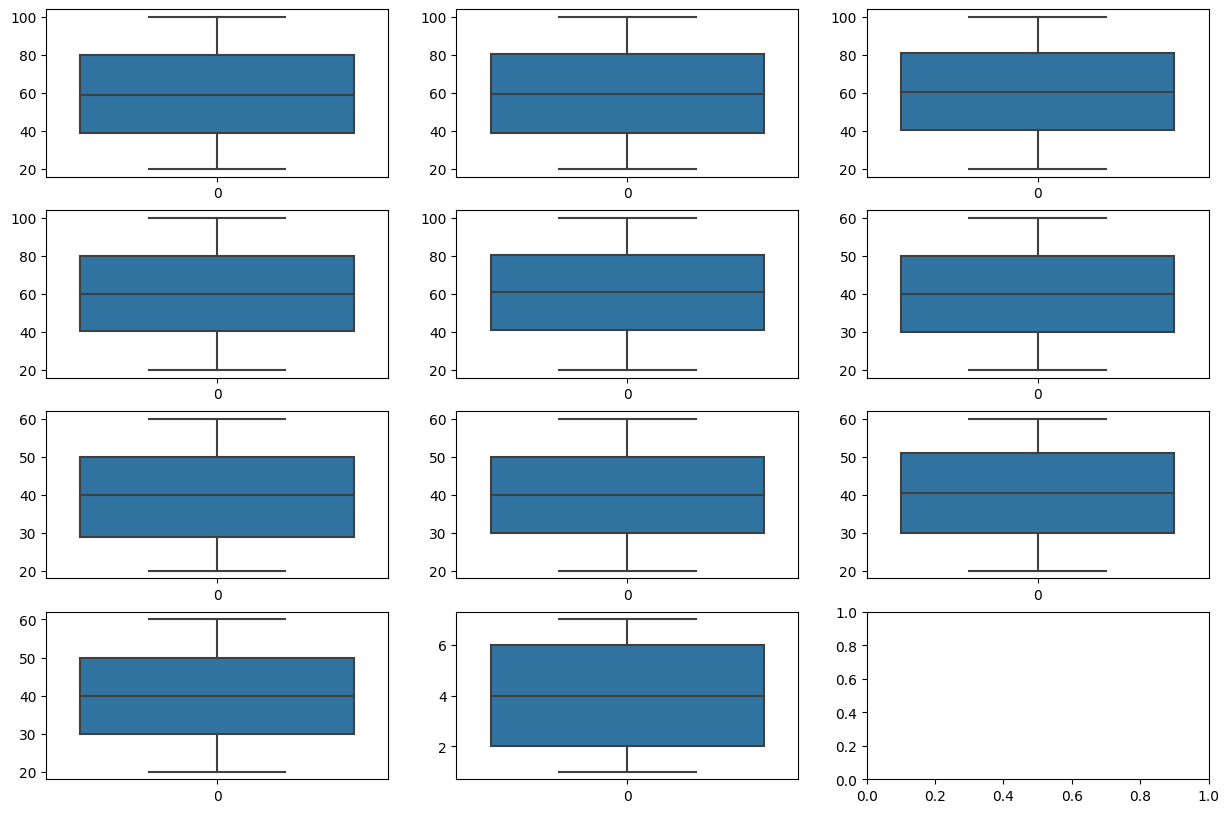

In [547]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
sns.boxplot(df['avg_price_Mon'], ax = axs[0,0])
sns.boxplot(df['avg_price_Tue'], ax = axs[0,1])
sns.boxplot(df['avg_price_Wed'], ax = axs[0,2])
sns.boxplot(df['avg_price_Thu'], ax = axs[1,0])
sns.boxplot(df['avg_price_Fri'], ax = axs[1,1])
sns.boxplot(df['time_on_site_Mon'], ax = axs[1,2])
sns.boxplot(df['time_on_site_Tue'], ax = axs[2,0])
sns.boxplot(df['time_on_site_Wed'], ax = axs[2,1])
sns.boxplot(df['time_on_site_Thu'], ax = axs[2,2])
sns.boxplot(df['time_on_site_Fri'], ax = axs[3,0])
sns.boxplot(df['pages_visited_Mon'], ax = axs[3,1])

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Mon'>

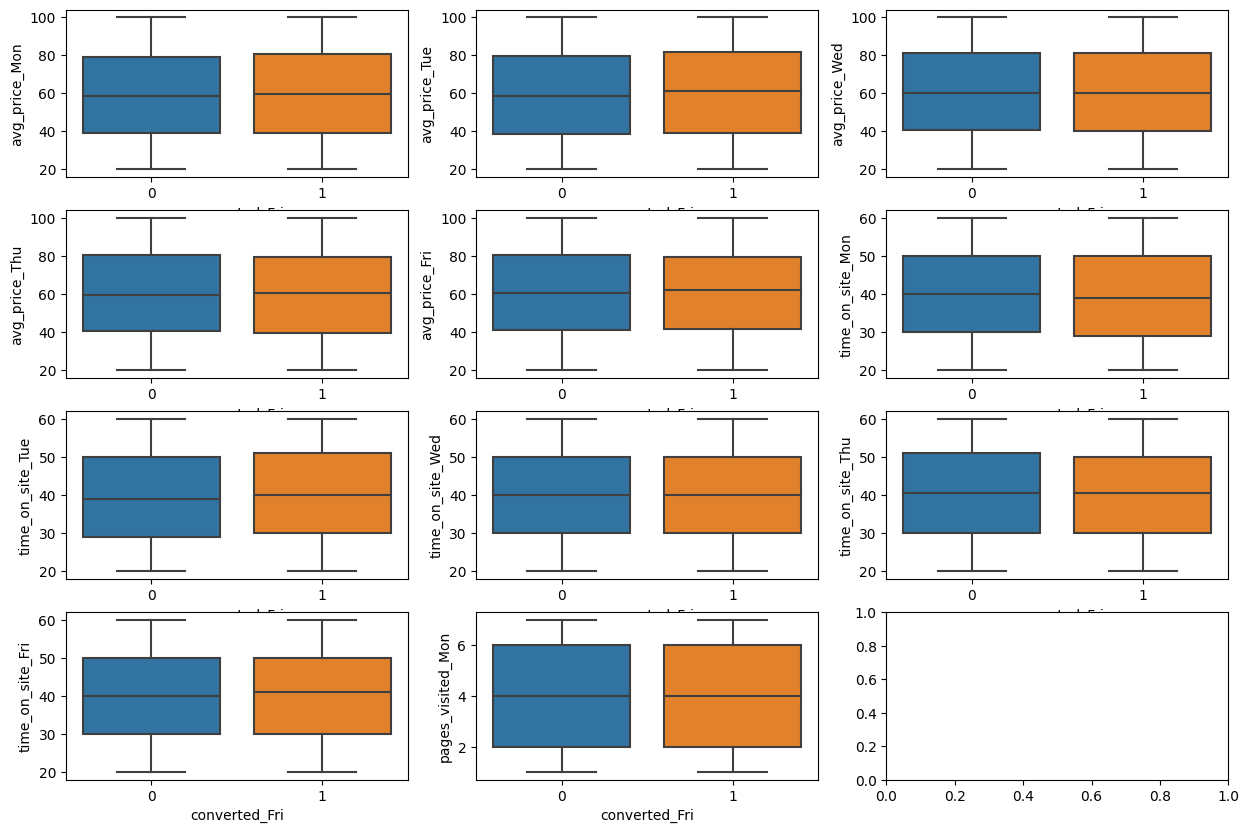

In [548]:
fig, axs = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(x='converted_Fri', y='avg_price_Mon', data=df, ax=axs[0][0])
sns.boxplot(x='converted_Fri', y='avg_price_Tue', data=df, ax=axs[0][1])
sns.boxplot(x='converted_Fri', y='avg_price_Wed', data=df, ax=axs[0][2])
sns.boxplot(x='converted_Fri', y='avg_price_Thu', data=df, ax=axs[1][0])
sns.boxplot(x='converted_Fri', y='avg_price_Fri', data=df, ax=axs[1][1])
sns.boxplot(x='converted_Fri', y='time_on_site_Mon', data=df, ax=axs[1][2])
sns.boxplot(x='converted_Fri', y='time_on_site_Tue', data=df, ax=axs[2][0])
sns.boxplot(x='converted_Fri', y='time_on_site_Wed', data=df, ax=axs[2][1])
sns.boxplot(x='converted_Fri', y='time_on_site_Thu', data=df, ax=axs[2][2])
sns.boxplot(x='converted_Fri', y='time_on_site_Fri', data=df, ax=axs[3][0])
sns.boxplot(x='converted_Fri', y='pages_visited_Mon', data=df, ax=axs[3][1])

We can see  from the box plot all the continous variables shows the same effect. none can be considered as a strong predictor

In [634]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

<Axes: xlabel='avg_price_Thu', ylabel='Count'>

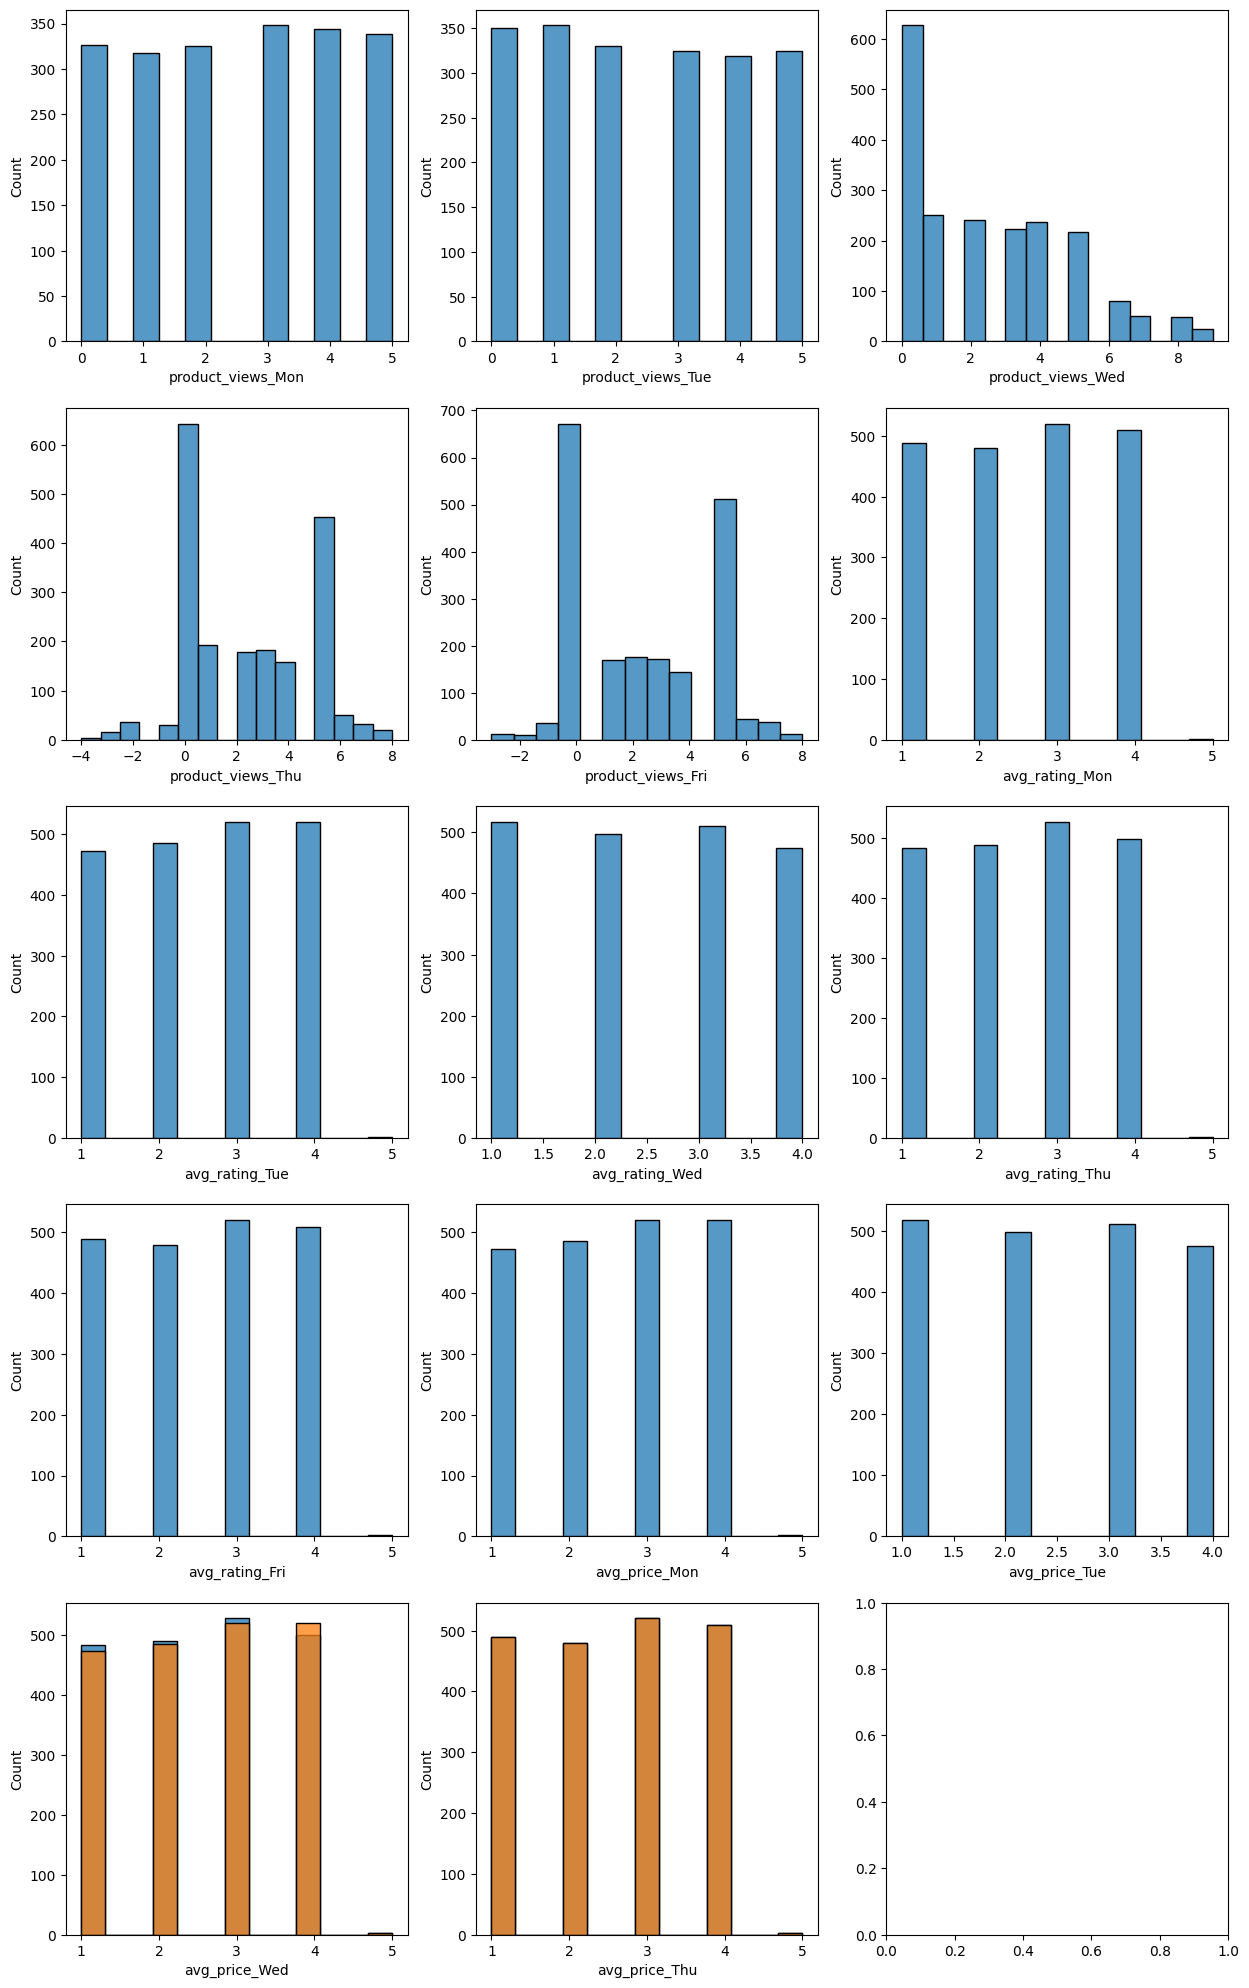

In [638]:
fig, axs = plt.subplots(5,3, figsize=(15,25))
sns.histplot(df['product_views_Mon'], ax=axs[0][0])
sns.histplot(df['product_views_Tue'], ax=axs[0][1])
sns.histplot(df['product_views_Wed'], ax=axs[0][2])
sns.histplot(df['product_views_Thu'], ax=axs[1][0])
sns.histplot(df['product_views_Fri'], ax=axs[1][1])
sns.histplot(df['avg_rating_Mon'], ax=axs[1][2])
sns.histplot(df['avg_rating_Tue'], ax=axs[2][0])

sns.histplot(df['avg_rating_Wed'], ax=axs[2][1])

sns.histplot(df['avg_rating_Thu'], ax=axs[2][2])
sns.histplot(df['avg_rating_Fri'], ax=axs[3][0])

sns.histplot(df['avg_price_Mon'], ax=axs[3][1])

sns.histplot(df['avg_price_Tue'], ax=axs[3][2])
sns.histplot(df['avg_price_Wed'], ax=axs[4][0])

sns.histplot(df['avg_price_Thu'], ax=axs[4][1])
sns.histplot(df['avg_price_Fri'], ax=axs[4][0])

sns.histplot(df['avg_price_Thu'], ax=axs[4][1])

We can see that product view are going down on Wednesday 

In [639]:
numerical_columns = ['visitor_id','product_views_Mon', 'product_views_Tue', 'product_views_Wed','product_views_Thu', 'product_views_Fri']

In [640]:
for column in numerical_columns:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

visitor_id: skewness = 0.0, kurtosis = -1.2000006000001502
product_views_Mon: skewness = -0.04339723992227179, kurtosis = -1.2595334694359583
product_views_Tue: skewness = 0.05239895534857225, kurtosis = -1.278349926686584
product_views_Wed: skewness = 0.7078649532941341, kurtosis = -0.35422487943281133
product_views_Thu: skewness = 0.18508333245295, kurtosis = -1.019154529926297
product_views_Fri: skewness = 0.19578852072874067, kurtosis = -1.230292770208432


In [551]:
if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))

In [552]:
z_scores = zscore(df[numerical_columns])

In [553]:
threshold = 3

In [554]:
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

<Axes: xlabel='converted_Fri'>

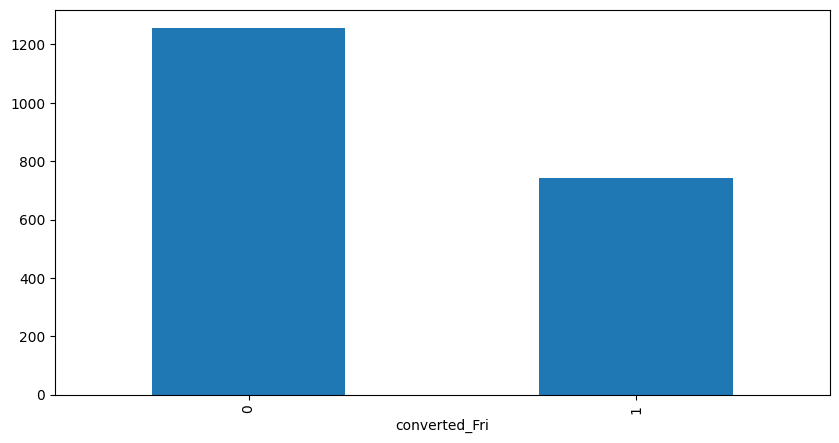

In [556]:
df.groupby('converted_Fri')['visitor_location'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='converted_Fri'>

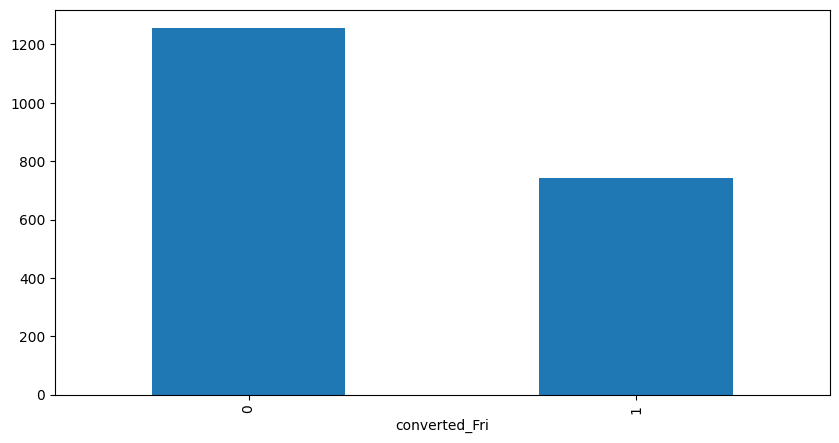

In [557]:
df.groupby('converted_Fri')['marketing_channel'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='converted_Fri'>

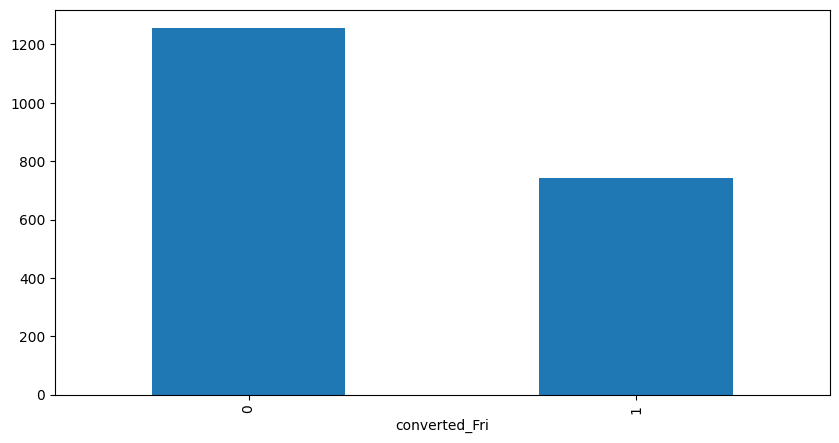

In [558]:
df.groupby('converted_Fri')['gender'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='converted_Fri'>

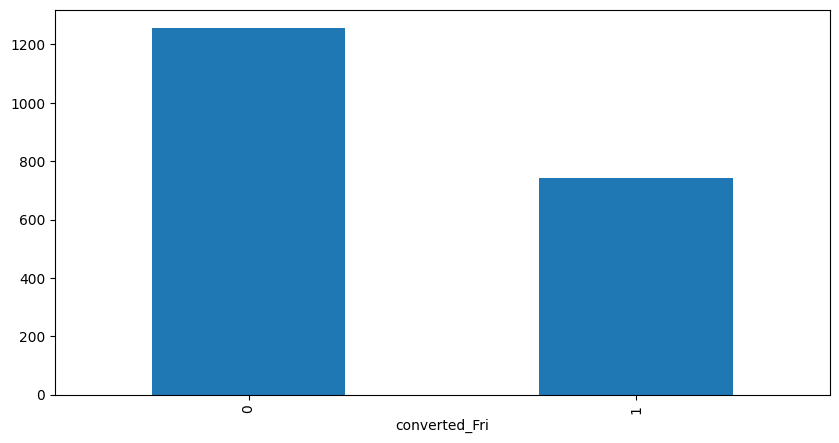

In [559]:
df.groupby('converted_Fri')['gender'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='converted_Fri', ylabel='Count'>

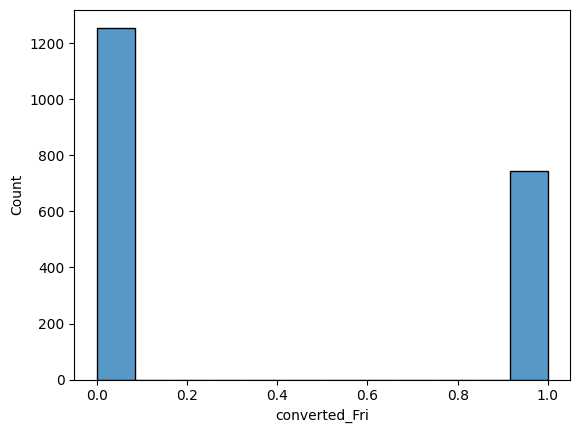

In [560]:
sns.histplot(df.converted_Fri)

<Axes: xlabel='gender', ylabel='Count'>

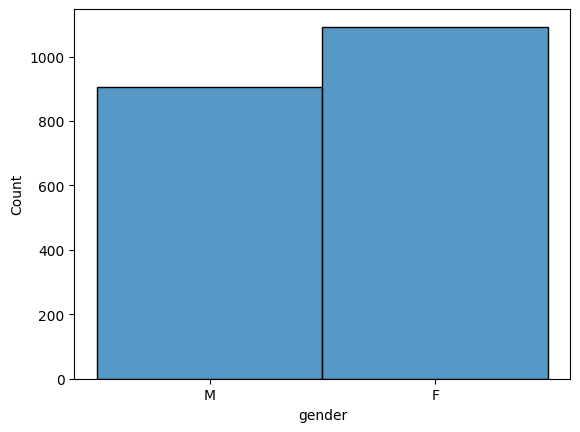

In [561]:
sns.histplot(df.gender)

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [563]:
df.groupby(['visitor_location', 'converted_Fri'])['gender'].count().unstack()

converted_Fri,0,1
visitor_location,,
Asia,231,138
Australia,268,135
Europe,235,148
North America,267,145
South America,255,178


In [564]:
df.groupby(['marketing_channel', 'converted_Fri'])['gender'].count().unstack()

converted_Fri,0,1
marketing_channel,,
facebook,238,156
google,234,165
instagram,257,174
organic,311,96
youtube,216,153


In [565]:
df.groupby(['gender', 'converted_Fri'])['gender'].count().unstack()

converted_Fri,0,1
gender,,
F,602,491
M,654,253


***We can see that all of our categorical varibales can be a strong predictor 

In [566]:
df.avg_rating_Mon = df.avg_rating_Mon.astype('int64')
df.avg_rating_Tue = df.avg_rating_Tue.astype('int64')
df.avg_rating_Wed = df.avg_rating_Wed.astype('int64')
df.avg_rating_Thu = df.avg_rating_Thu.astype('int64')

df.avg_rating_Fri = df.avg_rating_Mon.astype('int64')
df.avg_price_Mon = df.avg_rating_Tue.astype('int64')
df.avg_price_Tue = df.avg_rating_Wed.astype('int64')
df.avg_price_Wed = df.avg_rating_Thu.astype('int64')

df.avg_price_Thu = df.avg_rating_Mon.astype('int64')
df.avg_price_Fri = df.avg_rating_Tue.astype('int64')
df.time_on_site_Mon = df.avg_rating_Wed.astype('int64')
df.time_on_site_Tue = df.avg_rating_Thu.astype('int64')



<Axes: xlabel='converted_Fri', ylabel='avg_rating_Thu'>

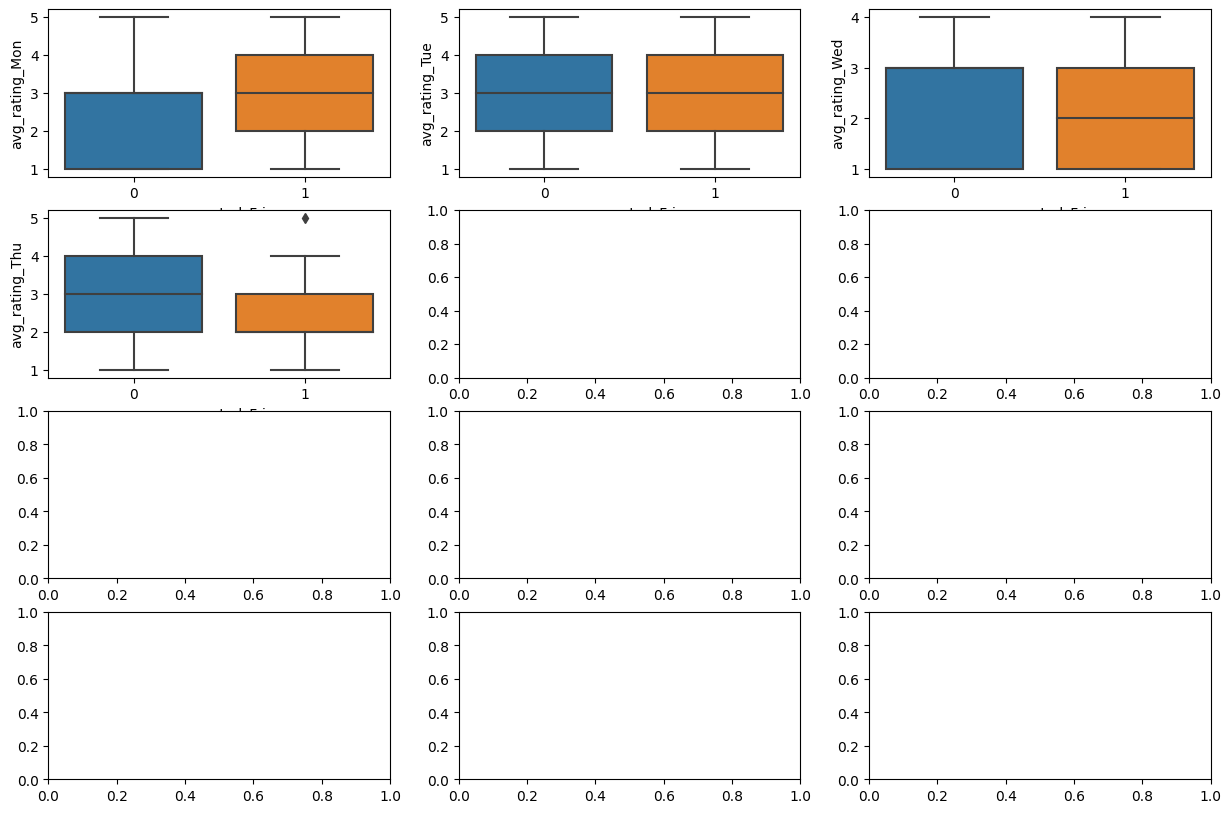

In [567]:
fig, axs = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(x='converted_Fri', y='avg_rating_Mon', data=df, ax=axs[0][0])
sns.boxplot(x='converted_Fri', y='avg_rating_Tue', data=df, ax=axs[0][1])
sns.boxplot(x='converted_Fri', y='avg_rating_Wed', data=df, ax=axs[0][2])
sns.boxplot(x='converted_Fri', y='avg_rating_Thu', data=df, ax=axs[1][0])

<Axes: xlabel='converted_Fri', ylabel='avg_price_Wed'>

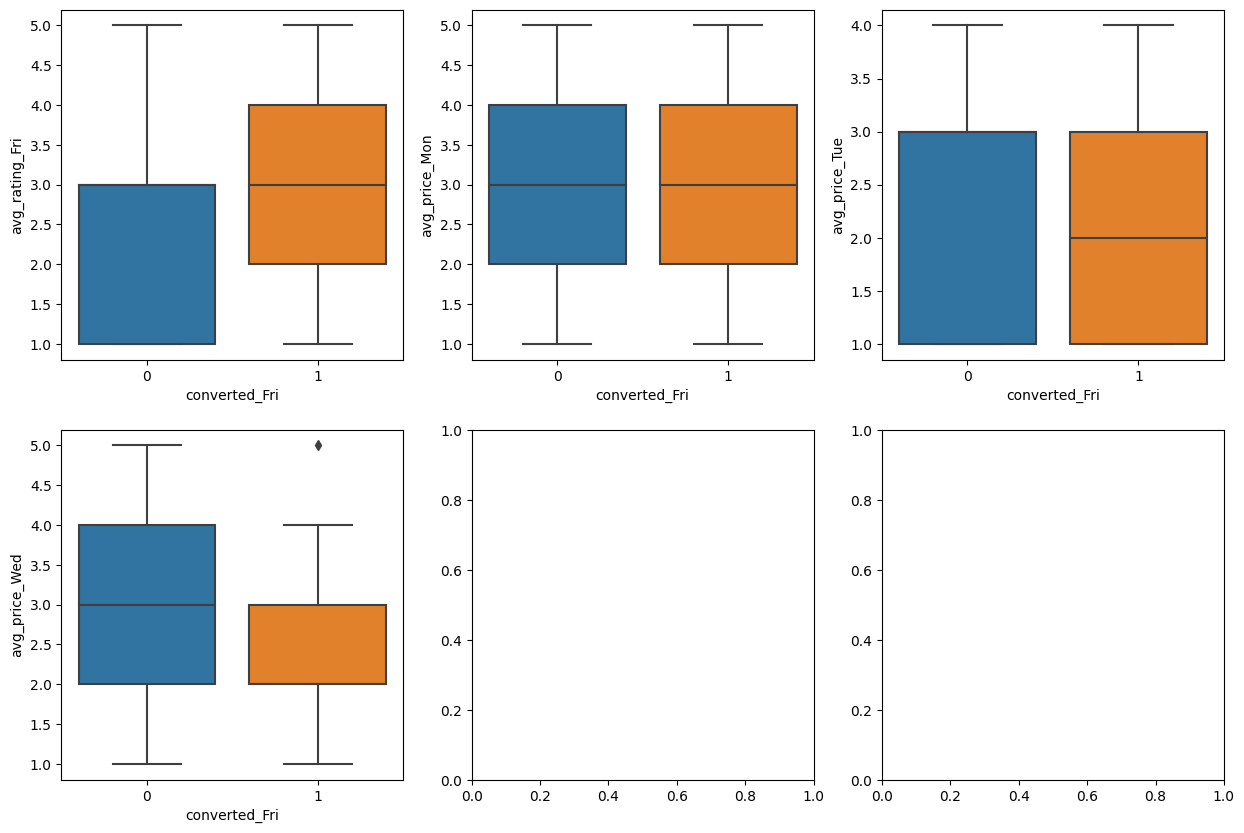

In [568]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(x='converted_Fri', y='avg_rating_Fri', data=df, ax=axs[0][0])
sns.boxplot(x='converted_Fri', y='avg_price_Mon', data=df, ax=axs[0][1])
sns.boxplot(x='converted_Fri', y='avg_price_Tue', data=df, ax=axs[0][2])
sns.boxplot(x='converted_Fri', y='avg_price_Wed', data=df, ax=axs[1][0])

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Tue'>

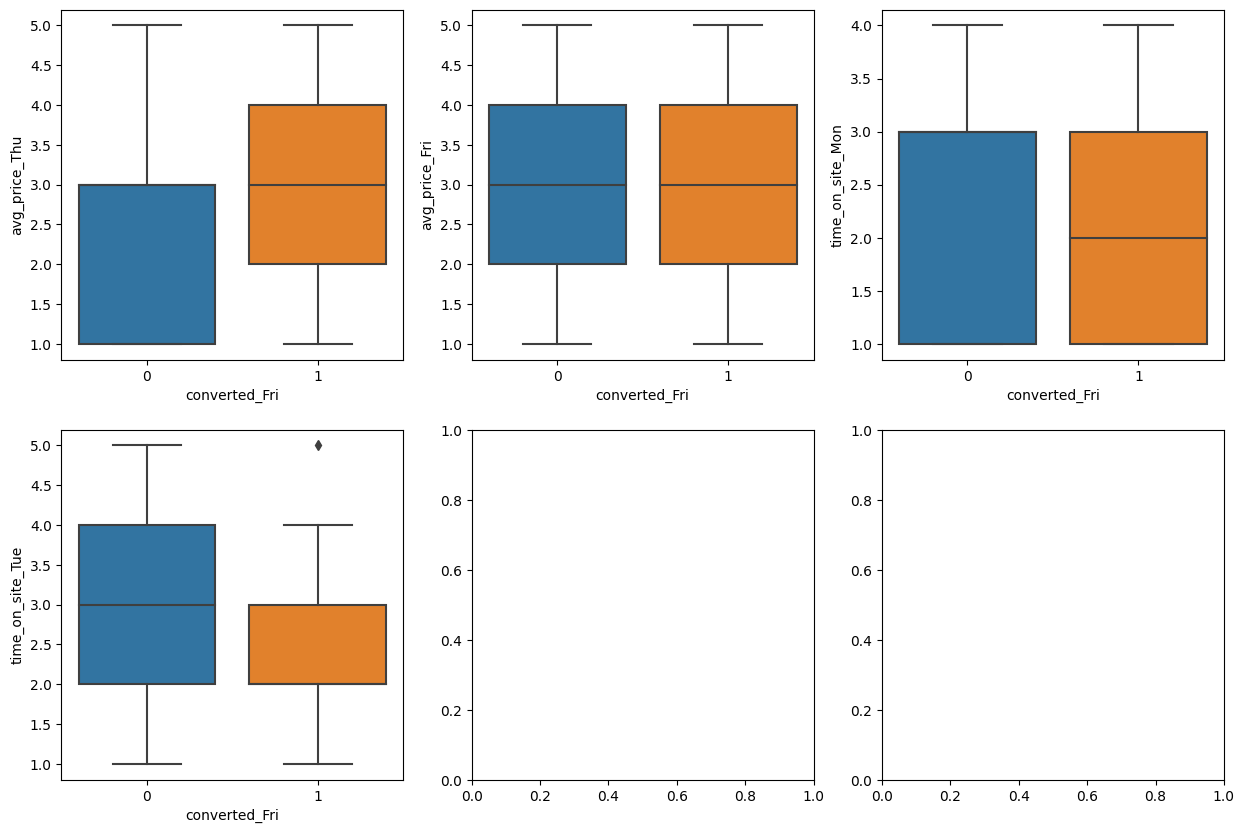

In [569]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(x='converted_Fri', y='avg_price_Thu', data=df, ax=axs[0][0])
sns.boxplot(x='converted_Fri', y='avg_price_Fri', data=df, ax=axs[0][1])
sns.boxplot(x='converted_Fri', y='time_on_site_Mon', data=df, ax=axs[0][2])
sns.boxplot(x='converted_Fri', y='time_on_site_Tue', data=df, ax=axs[1][0])

<Axes: xlabel='gender', ylabel='converted_Fri'>

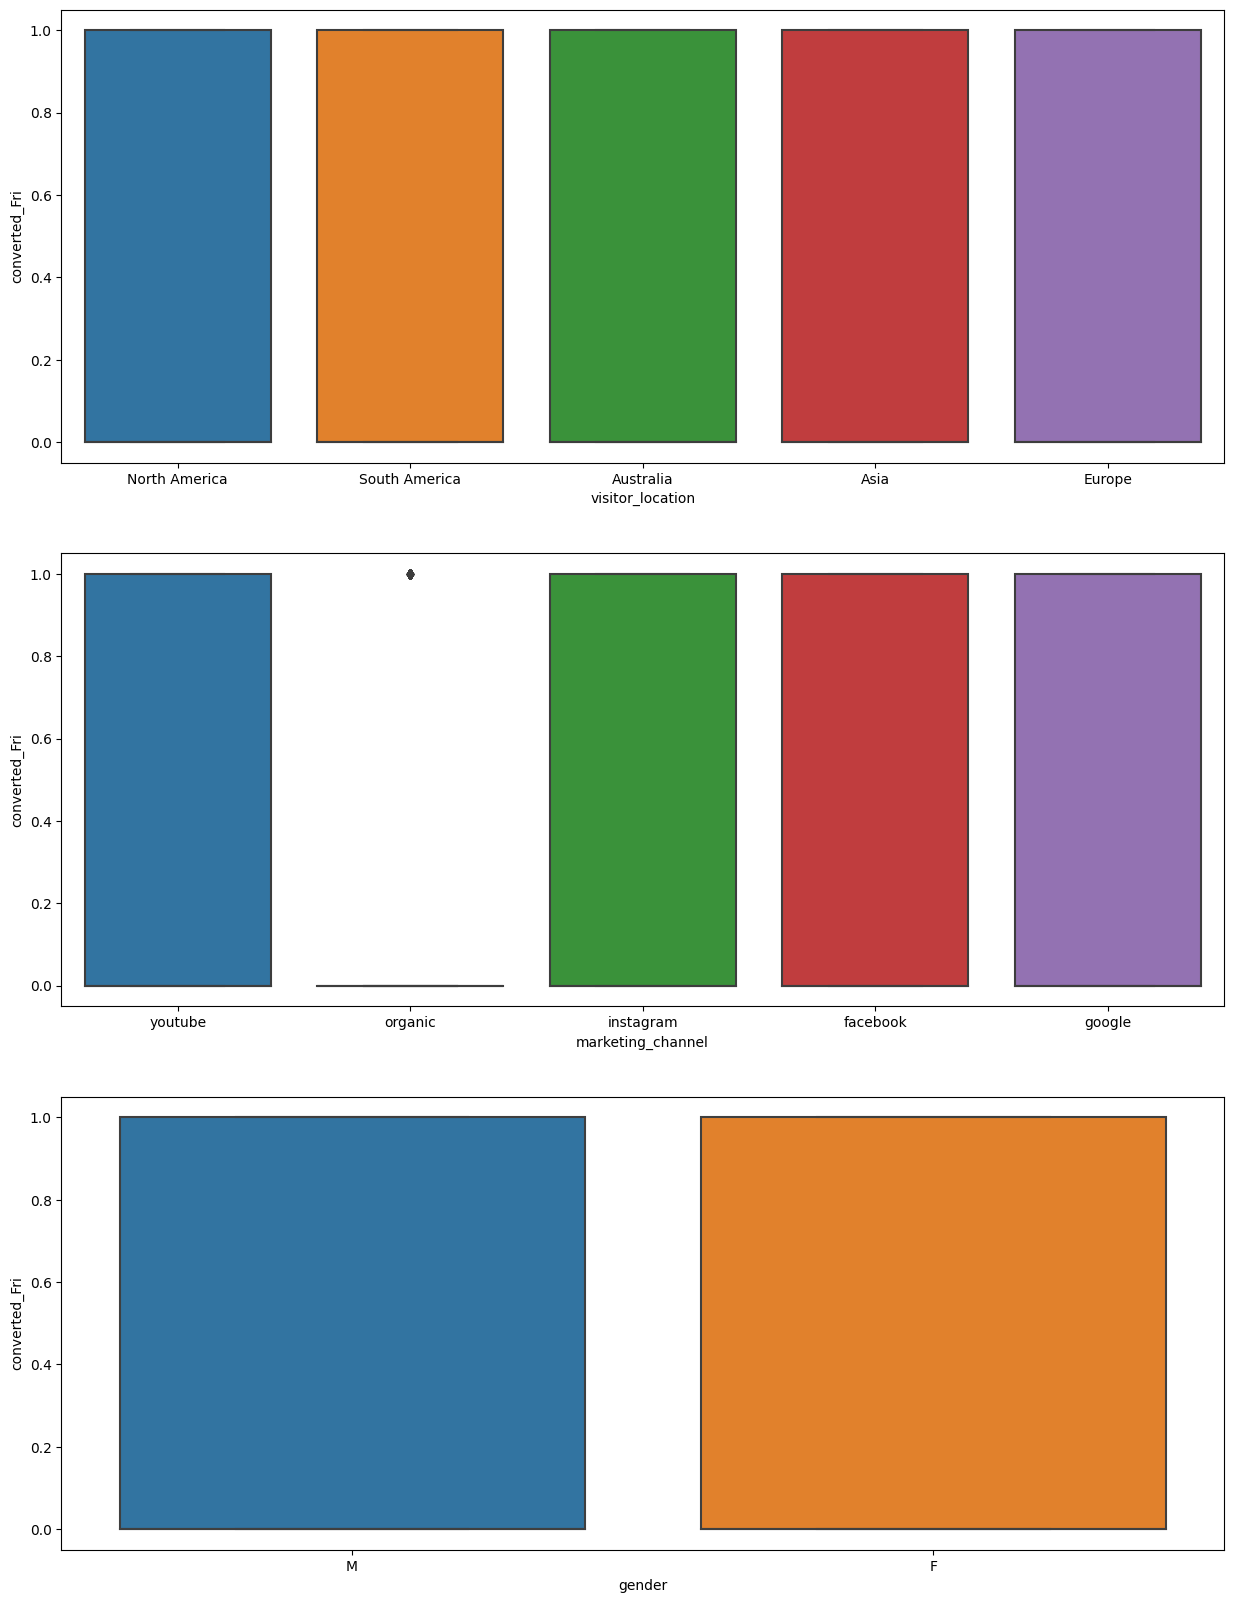

In [570]:
fig, [ax1,ax2,ax3] = plt.subplots(3,1, figsize=(15,20))

sns.boxplot(x='visitor_location',y='converted_Fri', data=df, ax=ax1)
sns.boxplot(x='marketing_channel',y='converted_Fri', data=df, ax=ax2)
sns.boxplot(x='gender',y='converted_Fri', data=df, ax=ax3)

###Based on our inital analysis we can see that all variables have the somewhat similar effect on the outcome. Hence we can consider all of them for further analysis

In [571]:
numerical_columns = ['visitor_id','product_views_Mon', 'product_views_Tue', 'product_views_Wed','product_views_Thu', 'product_views_Fri']

In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2000 non-null   int64 
 1   visitor_id         2000 non-null   int64 
 2   visitor_location   2000 non-null   object
 3   marketing_channel  2000 non-null   object
 4   gender             2000 non-null   object
 5   product_views_Mon  2000 non-null   int64 
 6   product_views_Tue  2000 non-null   int64 
 7   product_views_Wed  2000 non-null   int64 
 8   product_views_Thu  2000 non-null   int64 
 9   product_views_Fri  2000 non-null   int64 
 10  avg_rating_Mon     2000 non-null   int64 
 11  avg_rating_Tue     2000 non-null   int64 
 12  avg_rating_Wed     2000 non-null   int64 
 13  avg_rating_Thu     2000 non-null   int64 
 14  avg_rating_Fri     2000 non-null   int64 
 15  avg_price_Mon      2000 non-null   int64 
 16  avg_price_Tue      2000 non-null   int64 


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2000 non-null   int64 
 1   visitor_id         2000 non-null   int64 
 2   visitor_location   2000 non-null   object
 3   marketing_channel  2000 non-null   object
 4   gender             2000 non-null   object
 5   product_views_Mon  2000 non-null   int64 
 6   product_views_Tue  2000 non-null   int64 
 7   product_views_Wed  2000 non-null   int64 
 8   product_views_Thu  2000 non-null   int64 
 9   product_views_Fri  2000 non-null   int64 
 10  avg_rating_Mon     2000 non-null   int64 
 11  avg_rating_Tue     2000 non-null   int64 
 12  avg_rating_Wed     2000 non-null   int64 
 13  avg_rating_Thu     2000 non-null   int64 
 14  avg_rating_Fri     2000 non-null   int64 
 15  avg_price_Mon      2000 non-null   int64 
 16  avg_price_Tue      2000 non-null   int64 


In [598]:
cat_columns = ['visitor_location','marketing_channel','gender']
num_columns = ['product_views_Mon','product_views_Tue','product_views_Wed','product_views_Thu', 'product_views_Fri', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri','time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu','pages_visited_Fri']
target = 'converted_Fri'

In [599]:
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,None,youtube,M,4,5,2,1,2,...,3,23,46,57,4,5,5,4,6,1
1,1,2,None,organic,F,2,5,0,1,5,...,3,39,24,51,5,6,7,6,2,0
2,2,3,None,instagram,M,3,4,0,-3,5,...,2,22,34,31,1,3,3,2,3,1
3,3,4,None,facebook,M,1,0,0,5,0,...,2,43,22,39,3,4,7,7,1,0
4,4,5,None,instagram,F,1,5,2,2,3,...,1,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,None,organic,F,3,0,0,4,2,...,2,51,44,29,5,1,5,7,7,0
1996,1996,1997,None,google,M,1,2,0,4,1,...,2,33,59,38,1,6,6,7,6,0
1997,1997,1998,None,facebook,M,2,3,0,0,8,...,2,30,48,38,2,1,7,6,4,0
1998,1998,1999,None,youtube,F,2,2,2,5,5,...,4,51,41,56,6,4,2,2,3,1


In [600]:
# build pipeline (Hold the cleaned data )
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [601]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)


In [602]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [603]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [604]:
x_train_transformed.shape

(1600, 30)

In [605]:
x_test_transformed.shape

(400, 30)

In [606]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2000 non-null   int64 
 1   visitor_id         2000 non-null   int64 
 2   visitor_location   0 non-null      object
 3   marketing_channel  2000 non-null   object
 4   gender             2000 non-null   object
 5   product_views_Mon  2000 non-null   int64 
 6   product_views_Tue  2000 non-null   int64 
 7   product_views_Wed  2000 non-null   int64 
 8   product_views_Thu  2000 non-null   int64 
 9   product_views_Fri  2000 non-null   int64 
 10  avg_rating_Mon     2000 non-null   int64 
 11  avg_rating_Tue     2000 non-null   int64 
 12  avg_rating_Wed     2000 non-null   int64 
 13  avg_rating_Thu     2000 non-null   int64 
 14  avg_rating_Fri     2000 non-null   int64 
 15  avg_price_Mon      2000 non-null   int64 
 16  avg_price_Tue      2000 non-null   int64 


In [614]:
knn = KNeighborsClassifier(n_neighbors = 45)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

0.5476190476190477
0.715


In [615]:
accuracies = []

for a in range(1,100):
        
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
    accuracies.append(f1_score(y_pred, y_test))

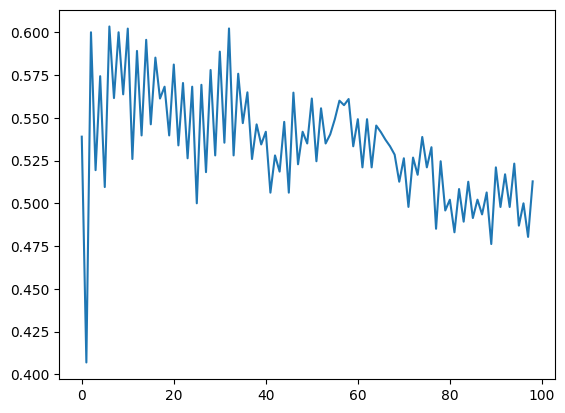

In [617]:
plt.plot(accuracies)

In [618]:
recall = []

for a in range(1,100):
        
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
    recall.append(f1_score(y_pred, y_test))
##you can change the f1_score to 

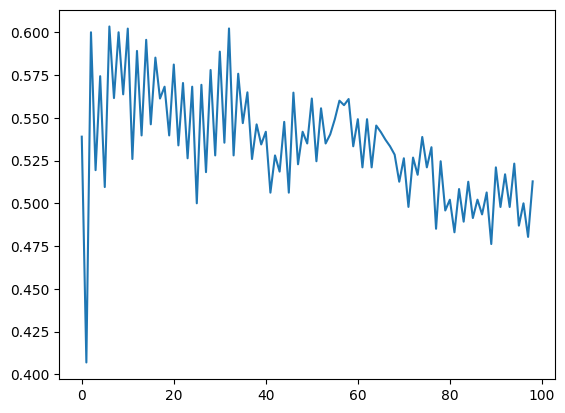

In [619]:
plt.plot(recall)

In [589]:
#Hyperparameter tuning

params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter= 50 ,scoring='f1')
randomsearch_knn.fit(X_train_transformed, y_train) ##()
print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 42}


In [590]:

knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
# Perform cross-validation
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='f1')
print("Cross-validation scores for KNN: ", cv_scores_knn)
knn_best.fit(X_train_transformed, y_train)
y_pred_knn = knn_best.predict(X_test_transformed)
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for KNN:  [0.62135922 0.51612903 0.55913978 0.5026178  0.56216216]
Test accuracy for KNN:  0.715


In [591]:
print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[213  32]
 [ 82  73]]
Accuracy:  0.715
Precision:  0.6952380952380952
Recall:  0.47096774193548385
F1 Score:  0.5615384615384614


In [621]:
pred_l_prob =knn.predict_proba(x_test_transformed)

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [622]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])

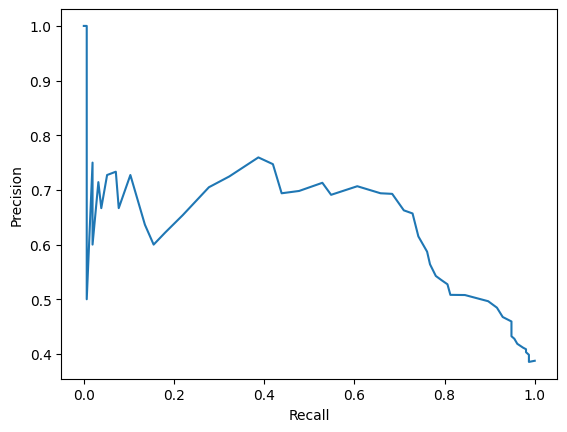

In [626]:
# We decided to look at the precision_recall curve as well to see the threshold between the 2 classes
precision, recall, _ = precision_recall_curve(y_test, pred_l_prob[:,1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [624]:
# Calculating the Geometric Means
gmeans = np.sqrt(tpr*(1-fpr))

In [625]:
# Finding the threshold
thresholds[np.argmax(gmeans)]

0.40404040404040403

***Explain your model to a business executive. Your explanation should include the following:

Data Exploration Results: Based on our initial testing we conducted we found out that there are no such outliers that will have impact on the model as such. We moved on and started plot some visuals in order to get a better understanding of the varibables we have in hand. We found out that:

- Product views are going up during the initial days of the week such as monday and tuesday but as wednesday comes the product view goes down.
- Product rating stays consistent througout and does not change drastically. 
- Most of the sales are coming from Organic channel and followed by instagram which shows we can increase our sales if we foucs on the online market.Our conversion rate in instagram has been better so we can use that.
- Female users are our major conversions so we should foucs on them.

- We made an intial hypothesis that all our varibales are strong predictors of the conversion and based on our finding we can prove that. 

Your approach for building and evaluating the model. 

- I took an initial approach of identifying what all variables are strong predictos of our target varibables. I then grouped all of categorical and numerical variables together. I did a onehot encoding to make dummies for the predcitors stored in our numerical and categorical columns. 

- I then fitted the model and checked the shape incase there is any missing column to ensure the model will not have any problem. 

- I ran Knn model to check the f-1 score since in our analysis we wanted to have a harmonic mean of the two precesion and recall. Hence we foucsed on F-1 score more than others. 

- We ran the model and check its f-1 came to be 0.54 which was then improved.

- we then fune tunned the model and the accurcy increased to 0.56 we also plotted recall and precision curves.


The final model you selected and how you know this is the best model for the problem.

- The model selected is best as it shows wether shows a good f-1 score and after fune tunning the model we got a good Precision score of ~0.7.

How the model should be used by the business, in business process.
- The model should be used in busines sin targeting customer such as female who have higher conversion rate. It can also be used in finding the market to target such as instagram which has higher conversion rate than other. We can also identify other media sources such as youtube platform to target.

-The demographic that has higher conversion are females, south africa and youtube as social media plartform.